# Final Project Phase 2 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 2 of the Final Project. Answer all statements addressed below as specified in the instructions for the project, covering all necessary details. Please be clear and concise in your answers. Each response should be at most 3 sentences. Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

# Data Collection and Cleaning
You are required to provide data collection and cleaning for the three (3) minimum datasets. Create a function for each of the following sections that reads or scrapes data from a file or website, manipulate and cleans the parsed data, and writes the cleaned data into a new file. 

Make sure your data cleaning and manipulation process is not too simple. Performing complex manipulation and using modules not taught in class shows effort, which will increase the chance of receiving full credit.


## Data Sources
Include sources (as links) to your datasets. Add any additional data sources if needed. Clearly indicate if a data source is different from one submitted in your Phase I, as we will check that it satisfies the requirements.
*   Downloaded Dataset Source: https://static.stooq.com/db/h/5_us_txt.zip (stooq.com) (Different from phase 1)
*   Web Collection #1 Source: https://www.optionstrategist.com/calculators/free-volatility-data (Same as phase 1)
*   Web Collection #2 Source: "https://alpha-vantage.p.rapidapi.com/query" (Same as phase 1)



## Downloaded Dataset Requirement

Fill in the predefined functions with your data scraping/parsing code. You may modify/rename each function as you seem fit, but you must provide at least 3 separate functions that clean each of your required datasets.


In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import plotly.graph_objs as go
from datetime import date
import matplotlib.pyplot as plt

In [23]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import os
import numpy as np
from pprint import pprint
import re
from datetime import datetime

def data_parser(stock):

    directory = r'D:\all_stocks\zzz'
    for entry in os.scandir(directory):
        filename = entry.name
        if filename == stock+".csv":
            with open(entry.path, "r" ,encoding = "utf-8") as f:
                reader = csv.reader(f, delimiter = ",")
                reader_list = list(reader)
                for item in reader_list[1:]:
                    year = item[2][0:4]
                    month = item[2][4:6]
                    day = item[2][6:8]
                    item[2] = month + "/" + day + "/" + year 
                    
                    item[3] = str(int(item[3])-60000)
                    d = datetime.strptime(item[3], "%H%M%S").time()
                    item[3] = d.strftime("%I:%M %p")
                    
                    item[1] = "5 mins"
                
                    for i in item[1:]:
                        if "." in i:
                            x = item.index(i)
                            item[x] = str('{:.3f}'.format(float(i)))
#                 pprint(reader_list)
                        
                array = np.array(reader_list)
                rawheaders = [reader_list[0]]
                headers = []
                for item in rawheaders[0]:
                    headers.append(re.sub(r"[<>]"," ",item))
                headers[8] = "VOLUME"
                headers[1] = "INTERVAL"
                headers[9] = "INT"
                headers[3] = "TIME (ET)"
                df = pd.DataFrame(array[1:], columns = headers)
                df.drop(["INT"], axis = 1, inplace = True)
                value = df['VOLUME'].isna().sum()
                
                
                dfnew = df.style.set_properties(subset=["INTERVAL"], **{'text-align': 'center'})    
#                 display(df)
                return df
#                 pprint(reader_list)



    
        
        


############ Function Call ############
data_parser("GOOGL")

,TICKER,INTERVAL,DATE,TIME (ET),OPEN,HIGH,LOW,CLOSE,VOLUME
0,GOOGL.US,5 mins,09/22/2021,09:30 AM,2786.080,2791.330,2778.150,2785.250,30195
1,GOOGL.US,5 mins,09/22/2021,09:35 AM,2784.400,2795.470,2784.400,2794.580,9712
2,GOOGL.US,5 mins,09/22/2021,09:40 AM,2791.220,2791.980,2780.770,2781.620,10601
3,GOOGL.US,5 mins,09/22/2021,09:45 AM,2780.400,2783.430,2774.310,2775.260,12234
4,GOOGL.US,5 mins,09/22/2021,09:50 AM,2772.650,2776.290,2771.030,2774.230,13938
5,GOOGL.US,5 mins,09/22/2021,09:55 AM,2774.310,2782.000,2773.990,2782.000,5085
6,GOOGL.US,5 mins,09/22/2021,10:00 AM,2785.710,2789.650,2784.690,2787.200,18659
7,GOOGL.US,5 mins,09/22/2021,10:05 AM,2788.720,2790.380,2787.070,2789.900,8083
8,GOOGL.US,5 mins,09/22/2021,10:10 AM,2789.410,2790.030,2778.000,2784.630,5556
9,GOOGL.US,5 mins,09/22/2021,10:15 AM,2783.630,2787.160,2783.630,2784.200,3541


## Web Collection Requirement \#1


In [23]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from pprint import pprint
import copy
import re
from IPython.display import display_html 

def web_parser1(dataframe):
    url = "https://www.optionstrategist.com/calculators/free-volatility-data"
    res = requests.get(url)
    page = res.content
    soup = BeautifulSoup(page, "html.parser")
    tag = soup.find_all("pre")
    tagstr = tag[0].text
    match1 = re.sub(r"[\d]{1,3}%ile","", tagstr)
    match2 = re.sub(r"\*","", match1)
    match3 = re.sub(r"\d{1,3}/","", match2)
    
    alist = match3.split()[17:]
    blist = []
    
    for item in alist:
        blist += item.split()
    for item in blist:
        if (item == '****************************************************************' or item == 'McMillan' or item == 'Analysis'):
            index = blist.index(item)
            blist.pop(index)
        if (item == 'www.optionstrategist.com' or item == '*' or item == '800-724-1817' or item == 'generated'):
            index = blist.index(item)
            blist.pop(index)

    clist = copy.deepcopy(blist)
    for item in clist:
        if (item == '800-724-1817' or item == 'Corp.' or item == 'Copyright'):
            clist.remove(item)
            
    dlist = copy.deepcopy(clist)
    for item in dlist:
        if item == 'Copyright'or item == 'Data' or item == 'by':
            dlist.remove(item)
    
    elist = copy.deepcopy(dlist)
    for item in elist:
        if item == '2021' or item == 'by':
            elist.remove(item)
    
    flist = copy.deepcopy(elist)
    for item in flist:
        if item == 'Analysis':
            flist.remove(item)
                
    rawlist = flist[97:]
    rawlist.remove('(option')
    rawlist.remove('symbols)')
    newlist = rawlist[2517:]
    
    
    
    rawlist1 = [newlist[i:i+7] for i in range(0,len(newlist),7)]
#     newlist1.insert(0, "[Symbol,hv20,hv50,hv100,Date,curiv, smth, close]")

    for item in rawlist1:
        year = item[4][0:2]
        month = item[4][2:4]
        day = item[4][4:6]
        item[4] = month + "/" + day + "/" + year    
    
    df = pd.DataFrame(rawlist1, columns = ['Symbol', 'HV-20', 'HV-50', 'HV-100', "Date", "Current IV", "Close"])
    
    indices = df.loc[(df['HV-20'].isin(['0.0'])) & (df['HV-50'].isin(['0.0'])) & (df['HV-100'].isin(['0.0']))].index
    dfremovable = df.loc[(df['HV-20'].isin(['0.0'])) & (df['HV-50'].isin(['0.0'])) & (df['HV-100'].isin(['0.0']))]
#     print(dfremovable)
#     print(indices)
    indexlist = [i for i in indices]
#     print(indexlist)
    df.drop(indexlist, inplace=True)
    df.reset_index(inplace = True)
    df.drop(["index"], axis = 1, inplace=True)
#     print(df)

    pd.set_option("display.max_rows", None, "display.max_columns", None)
    
    data = flist[111:2615]

#     df2 = pd.DataFrame(flist, columns = ['Future/Index', 'HV-20', 'HV-50', 'HV-100', "Date", "Current IV", "Close"])
#     display(df)
    
    count = 0
    for i,j in enumerate(data):
        if j == "OPTION":
            data.insert(i+1, "N/A")
    
    datacopy = []
    for k,l in enumerate(data):
#         print(k)
#         print(l) #2356
        if l == "0.00":
            datacopy += ["Date Unavailable", "0.00"]
        else:
            datacopy += [l]
            
    data = datacopy

    datalist = [data[i:i+7] for i in range(0,len(data),7)]
    
#     for item in datalist:
#         if item[4][0] == '2':
#             print(item)
#             year = item[4][0:2]
#             month = item[4][2:4]
#             day = item[4][4:6]
#             item[4] = month + "/" + day + "/" + year 
   
    df2 = pd.DataFrame(datalist, columns = ['Future/Index', 'HV-20', 'HV-50', 'HV-100', "Date", "Current IV", "Close"])
    
    df1_styler = df.style.set_table_attributes("style='display:inline'").set_caption('HV/IV Data for Stocks').set_properties(subset=["Symbol"], **{'text-align': 'left'})
    df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption(r'HV/IV Data for Futures and Index ----- Index begin with: $, Futures begin with: @').set_caption('HV/IV Data for Stocks').set_properties(subset=["Future/Index"], **{'text-align': 'left'})
    
#     display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)
#     display(df)
#     display(df2)
    
#     pprint(datalist)
    if dataframe == "df":
        return df
    else:
        return df2





############ Function Call ############
# web_parser1("df")

## Web Collection Requirement \#2

In [18]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [19]:
import requests
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show
from datetime import datetime

def web_parser2(stock):


    url = "https://alpha-vantage.p.rapidapi.com/query"

    querystring = {"time_period":"30","interval":"5min","series_type":"close","function":"SMA","symbol":stock,"datatype":"json"}

    headers = {
        'x-rapidapi-host': "alpha-vantage.p.rapidapi.com",
        'x-rapidapi-key': "1ae12c90f4msh38344d1088c0185p1a0587jsn0d32c0044762"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)

    data = response.json()
    
    
    
    rawtime = list(data['Technical Analysis: SMA'].keys())
    time = np.array([i[11:] for i in rawtime])
    
    
    newtime = [item.replace(":",".") for item in time]
    float_time = np.array(newtime, dtype="float64")    
    
#     newtime = np.array(time,dtype="float64")
    
    rawprice = list(data['Technical Analysis: SMA'].values())
    price = np.array([i["SMA"] for i in rawprice], dtype="float64")
    
    adict = {'Time': float_time[:50], 'Price': price[:50]}
#     pprint(adict)
    #   graphdf = pd.DataFrame(df)
    times = list(data['Technical Analysis: SMA'].keys())
    newtimes = []
    for item in times:
        year = item[0:4]
#         print(year)
        month = item[5:7]
#         print(month)
        day = item[8:10]
#         print(day)
        time = item[11:16]
#         print(time)
        newtimes.append(str(month + "/" + day + "/" + year + " " + time))

#   2021-12-08 17:30

    timetype = []
    for item in newtimes:
        timetype.append(datetime.strptime(item, "%m/%d/%Y %H:%M"))
#     print(timetype)
    
    time1 = np.array(timetype, dtype=np.datetime64)
    window_size = 30
    window = np.ones(window_size)/float(window_size)
    stockavg = np.convolve(price, window, 'same')

    p = figure(x_axis_type="datetime", title = stock + " 30-day Simple Moving Average(SMA)")
    p.grid.grid_line_alpha = 0.5
    p.xaxis.axis_label = 'Date/Time'
    p.yaxis.axis_label = 'Price'
    p.ygrid.band_fill_color = "darkorange"
    p.ygrid.band_fill_alpha = 0.4

    
    p.scatter(time1, price, size=10, legend_label='Price',
               color='blue', alpha=0.1, hatch_color = 'black')
    p.line(time1, price, legend_label='Average', color='cyan', line_width = 2.5)
    p.legend.location = "top_left"

    show(p)
    
# def web_parser_volume(stock):
# #     url = r"http://api.marketstack.com/v1/intraday?access_key = d4b97fb1a2432429cb116ed98d0311c0&symbols =" + stock + "& interval = 5min&date_from = 2021-09-21&date_to=2021-11-11"
#     url = "http://api.marketstack.com/v1/intraday?access_key=d4b97fb1a2432429cb116ed98d0311c0&symbols="+stock+"&date_from=2021-09-21&date_to=2021-11-11"
#     response = requests.get(url)
#     data = response.json()
#     pprint(data)
    


############ Function Call ############
web_parser2("GOOGL")

## Additional Dataset Parsing/Cleaning Functions

Write any supplemental (optional) functions here.

In [28]:
import os
import pandas as pd


def extra_source1():
    directory = r'D:\all_stocks'

#     for entry in os.scandir(directory):
#         filename = entry.name.split(".")[0].upper() + ".csv"
# #         print(filename)
#         filepath = entry.path
# #             print(type(filepath))
#         read_file = pd.read_csv(filepath)
#         filedir = 'D:\\all_stocks\\zzz\\' + filename
# #             print(filedir)
    print("Conversion Completed")
        
            
############ Function Call ############
extra_source1()

Conversion Completed


In [29]:
# Define further extra source functions as necessary

##### Inconsistencies
For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1.Copyright tags that looked like:
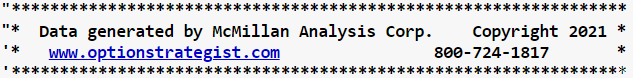
in between text data that was interrupting the data and preventing me from creating a consistent data frame. Also, I think there was a security feature that was preventing me to delete the whole tag as a single item, so I used deepcopy to create new copies of the list and got rid of all of the copyright tags. Also even though the data was in a table looking format, I couldn't parse it as an html table. I had to process it as text in between <pre> tags. 

2. I needed the current iv data from the website, but it was coupled with the percentile which looked like "591/ 85%ile". The problem here was that it was creating for each row, different lengths of lists based on the different number of digits in front of the "%ile" like 100%ile, 85%ile, 0%ile, etc. It was important that I process it so that I can get clean current implied volatility (IV) data from the table, and to make sure I even did, because it was creating a list with a different length every time and for me to extract it I needed a constant index. I used regular expressions to extract current IV out by getting rid of irregular percentiles.

3. In web_parser2 there were some HV values for the HV-20, HV-50, and HV-100 which were 0.0 for some stocks. Having 0.0 for each of them was not helpful so I had to find the stocks which had 0.0 for each of the HV. But I still had to keep the stocks with a non-zero value for atleast one of the HV so I can compare it to IV and draw an analysis about the stock's buy and sell signals, so it was important that I deal with it. I searched it using .loc method and dropped it inplace.

4. For web_parser2 I collected IVs (Implied Volatility) and HVs (Historical Volatility), for not only stocks but also indexes and futures. But if its not a stock, index, or future, meaning if its an option, it won't have a trading historical volatility, because options come in and out of existence for certain dates. This created an inconsistency in the data where the hv-100 field was blank, and for some of them, there were dates missing for some reason, which I couln't figure out why but still it was important data so I couldn't drop it. I inserted "N/A" for each option's HV and inserted "date unavalaible" for each future/index for which the date was missing, creating a consistent list which I then converted to a data frame.

5. For data_parser my values had an inconsistent number of decimal places. It didn't hold a lot of significance but it was an inconsistancy that I needed to take care of just to be able to present my data in a cleaner and consistent fashion. I extracted the numbers with a decimal point and added 0 padding to the values where it was needed.
